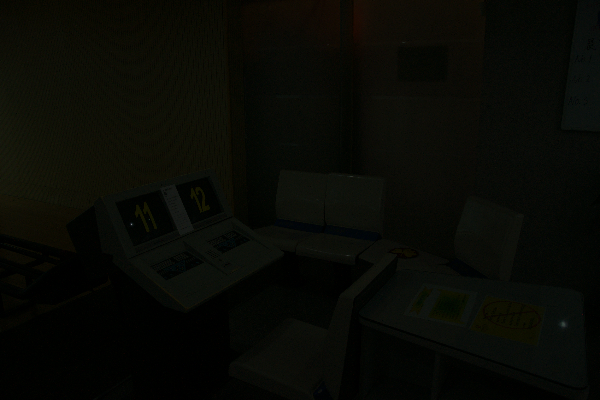

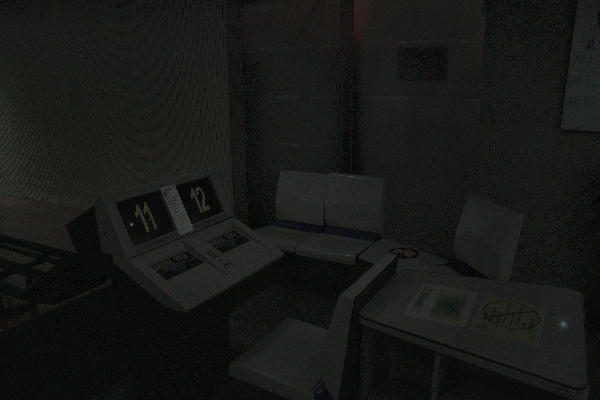

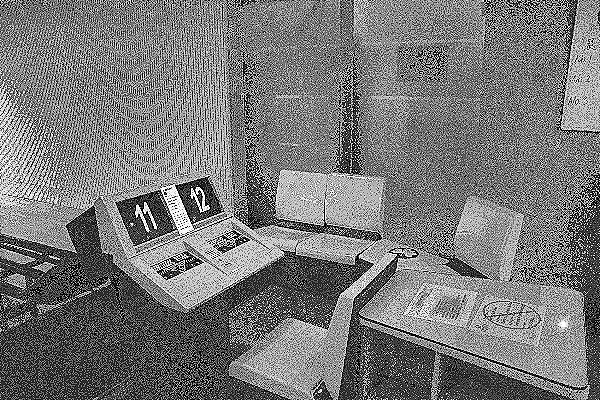

In [5]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def adjust_white_balance(image):
    result = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    avg_a = np.average(result[:, :, 1])
    avg_b = np.average(result[:, :, 2])
    result[:, :, 1] = result[:, :, 1] - ((avg_a - 128) * (result[:, :, 0] / 255.0) * 1.1)
    result[:, :, 2] = result[:, :, 2] - ((avg_b - 128) * (result[:, :, 0] / 255.0) * 1.1)
    result = cv2.cvtColor(result, cv2.COLOR_LAB2BGR)
    return result

def correct_color_cast(image):
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    cl = clahe.apply(l)
    limg = cv2.merge((cl,a,b))
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    return final

# Load your image
image = cv2.imread('665.png')

# Display the original image
cv2_imshow(image)

# Adjust white balance
wb_adjusted = adjust_white_balance(image)

# Correct color cast
final_image = correct_color_cast(wb_adjusted)

# Display the corrected image
cv2_imshow(final_image)

#Additional enhancement step (e.g., sharpening)
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])  # Sharpening kernel
enhanced_image = cv2.filter2D(final_image, -1, kernel)

# # Display the enhanced image
# cv2_imshow(enhanced_image)

# Convert the enhanced image to grayscale
gray_enhanced_image = cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2GRAY)

# Apply histogram equalization to the grayscale image
equalized_image = cv2.equalizeHist(gray_enhanced_image)

# Display the equalized image
cv2_imshow(equalized_image)